In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("kanser.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)  #we dont need these columns

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()   #assign M->0 B->1

In [38]:
M=data[data.diagnosis==0]
B=data[data.diagnosis==1]

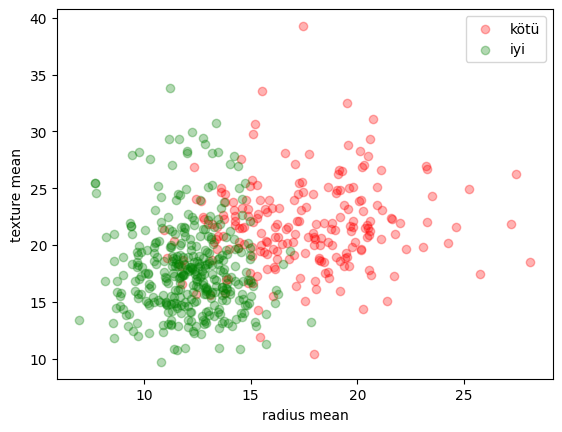

In [8]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malign",alpha=0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="benign",alpha=0.3)
plt.xlabel("radius mean")
plt.ylabel("texture mean")
plt.legend()
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
y = data.diagnosis.values
x = data.drop(["diagnosis"], axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=12)
 #if we compare the algorithms on the same dataset we have to stay same about test size and random state!! must be the same another algorithms!!

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()     
xtrain1=sc.fit_transform(xtrain)
xtest1=sc.transform(xtest)   

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [30]:
knn.fit(xtrain1,ytrain)
yhead=knn.predict(xtrain1)

In [31]:
knn.score(xtest1,ytest)

0.951048951048951

In [57]:
#which number of neighbours is the right one, we try one by one and look for the best result
scorelist = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(xtrain1, ytrain)
    yhead=knn2.predict(xtest1)
    scorelist.append(knn2.score(xtest1, ytest))

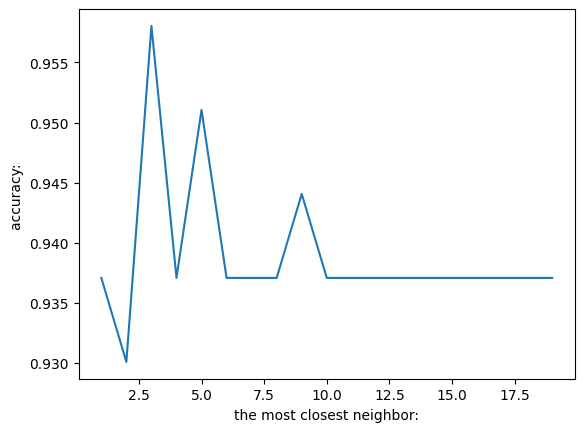

In [58]:
plt.plot(range(1,20),scorelist)
plt.xlabel("the most closest neighbor:")
plt.ylabel("accuracy: ")
plt.show()

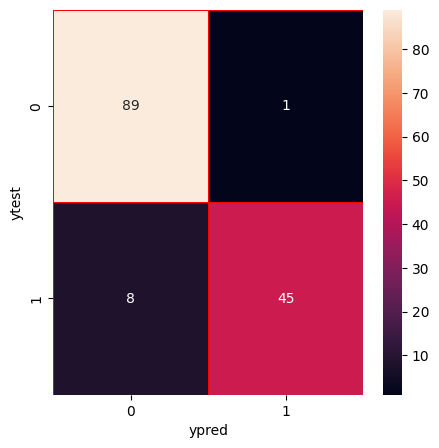

In [59]:
import seaborn as sns   
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(ytest, yhead)
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("ypred")
plt.ylabel("ytest")
plt.show()

In [48]:
sample_data=np.array([[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]])

In [49]:
sample_data

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [50]:
sample_data=sc.transform(sample_data)

c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [51]:
prediction=knn.predict(sample_data)

In [52]:
prediction

array([1])

In [53]:
if prediction==1:
    print("malign")
else:
    print("benign")

malign


In [54]:
predict_proba = knn.predict_proba(sample_data)

In [55]:
predict_proba   #ilk ve ikinci sınıfa ait olma olasılıklarını gösterir

array([[0., 1.]])